In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('teste_indicium_precificacao.csv')
df.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


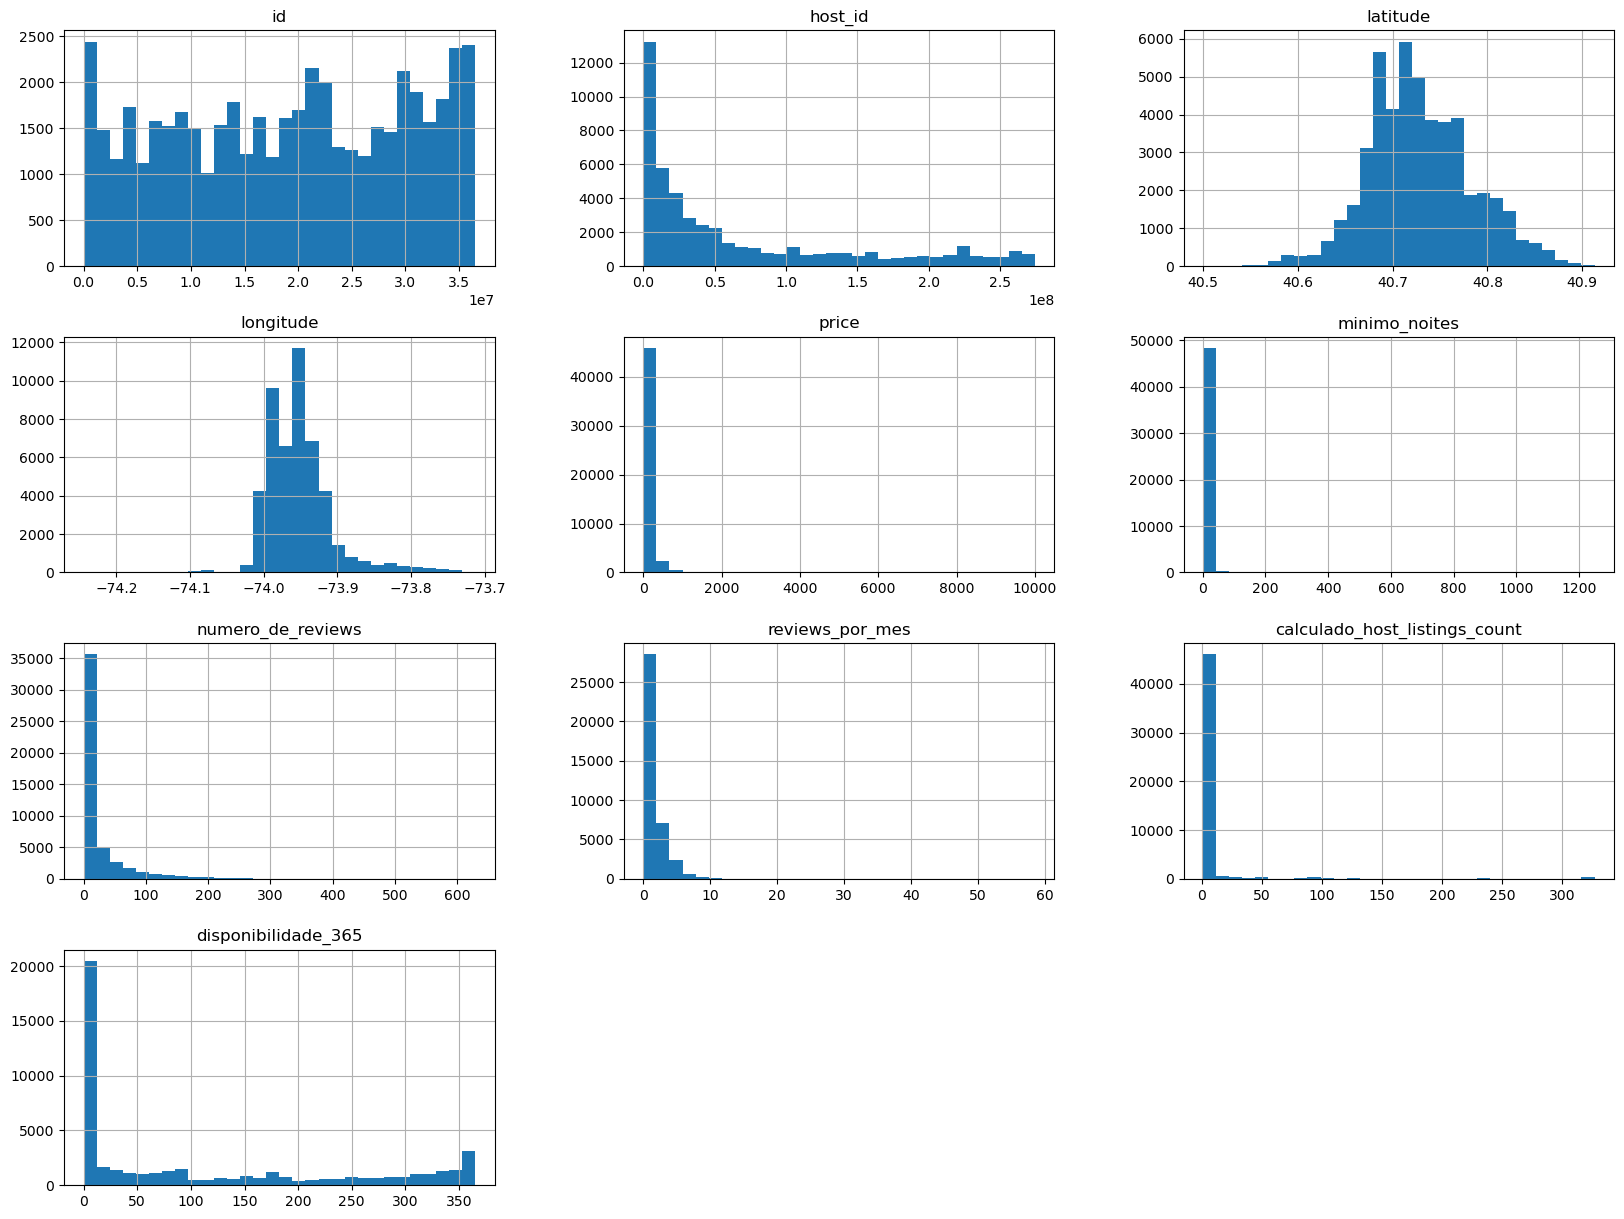

In [3]:
df.hist(bins=30, figsize=(20, 15))
plt.show()

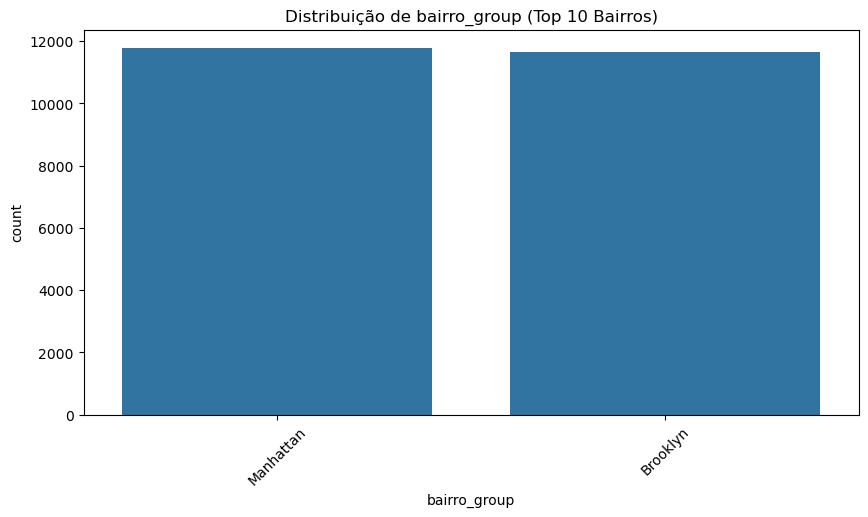

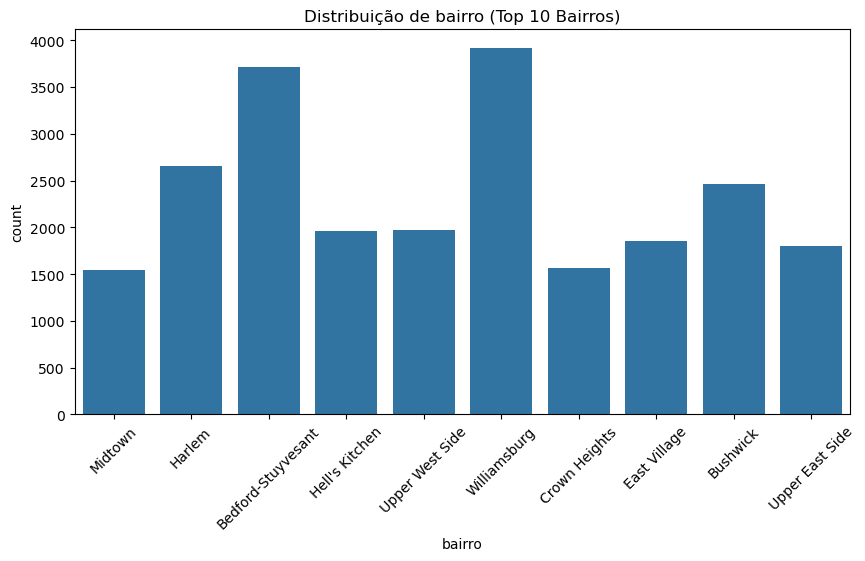

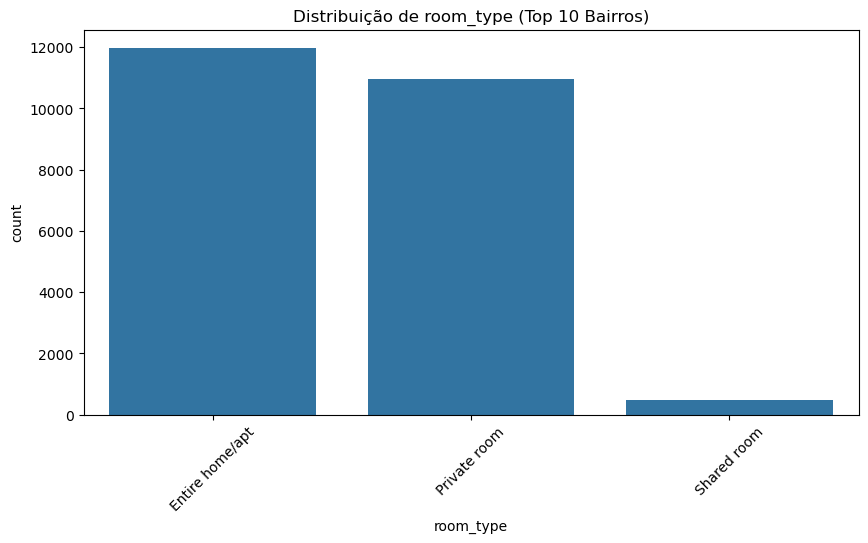

In [4]:
top_bairros = df['bairro'].value_counts().nlargest(10).index
df_top_bairros = df[df['bairro'].isin(top_bairros)]

for column in ['bairro_group', 'bairro', 'room_type']:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df_top_bairros, x=column)
    plt.title(f'Distribuição de {column} (Top 10 Bairros)')
    plt.xticks(rotation=45)
    plt.show()

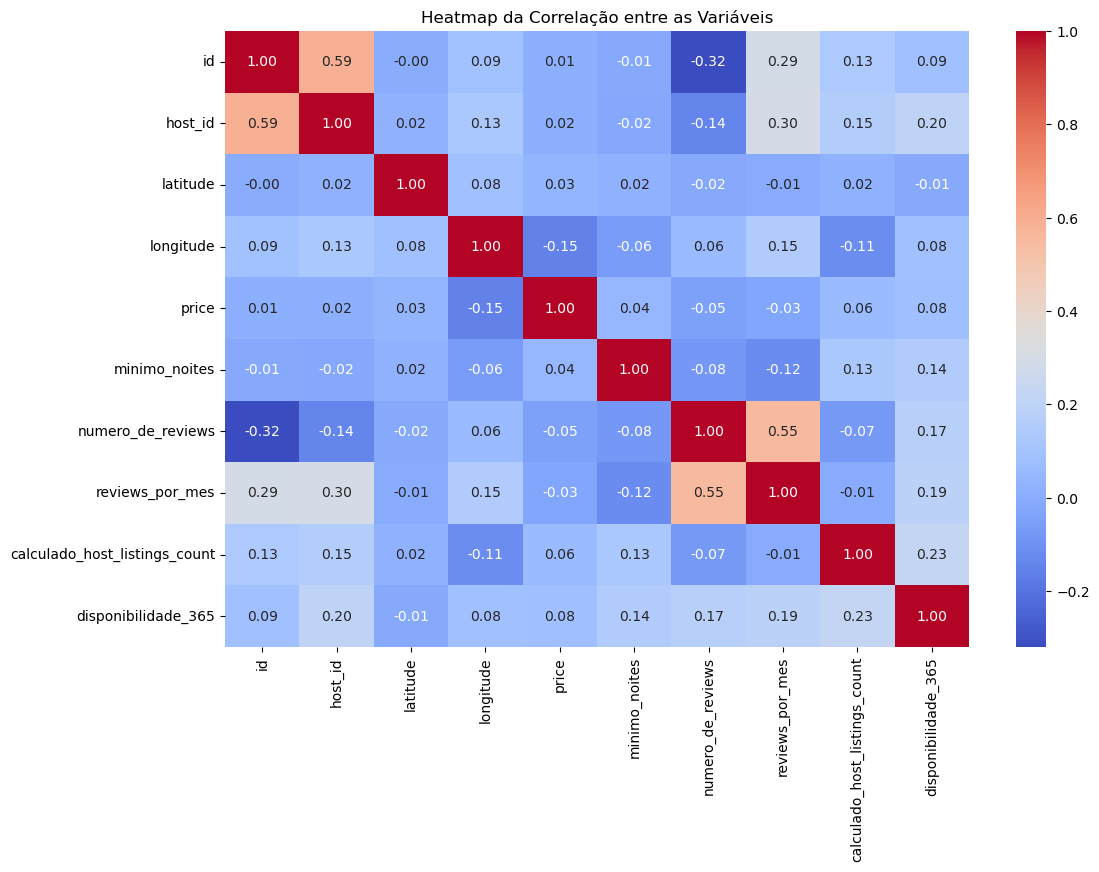

In [5]:
numeric_df = df.select_dtypes(include=[np.number])

corr_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap da Correlação entre as Variáveis')
plt.show()


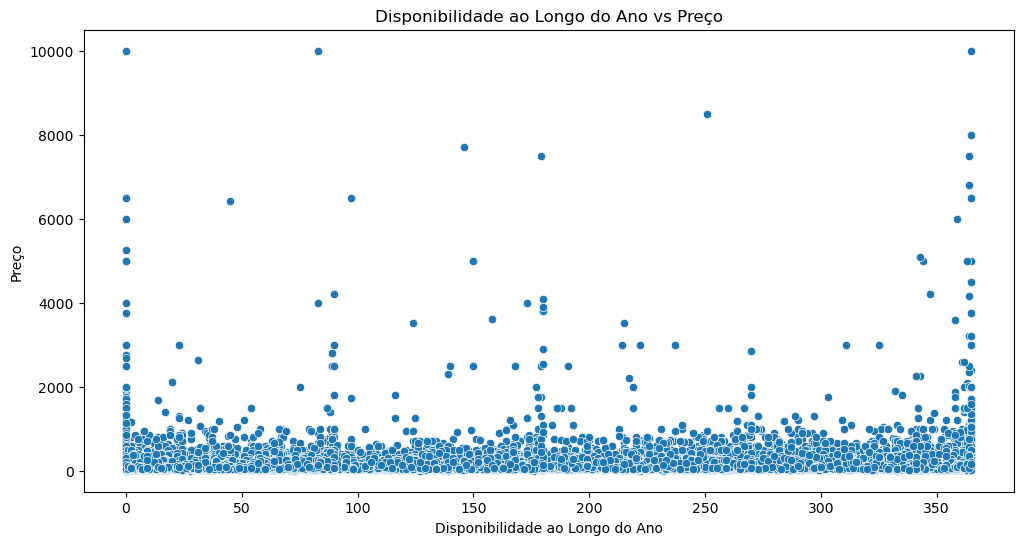

In [6]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='disponibilidade_365', y='price', data=df)
plt.title('Disponibilidade ao Longo do Ano vs Preço')
plt.xlabel('Disponibilidade ao Longo do Ano')
plt.ylabel('Preço')
plt.show()

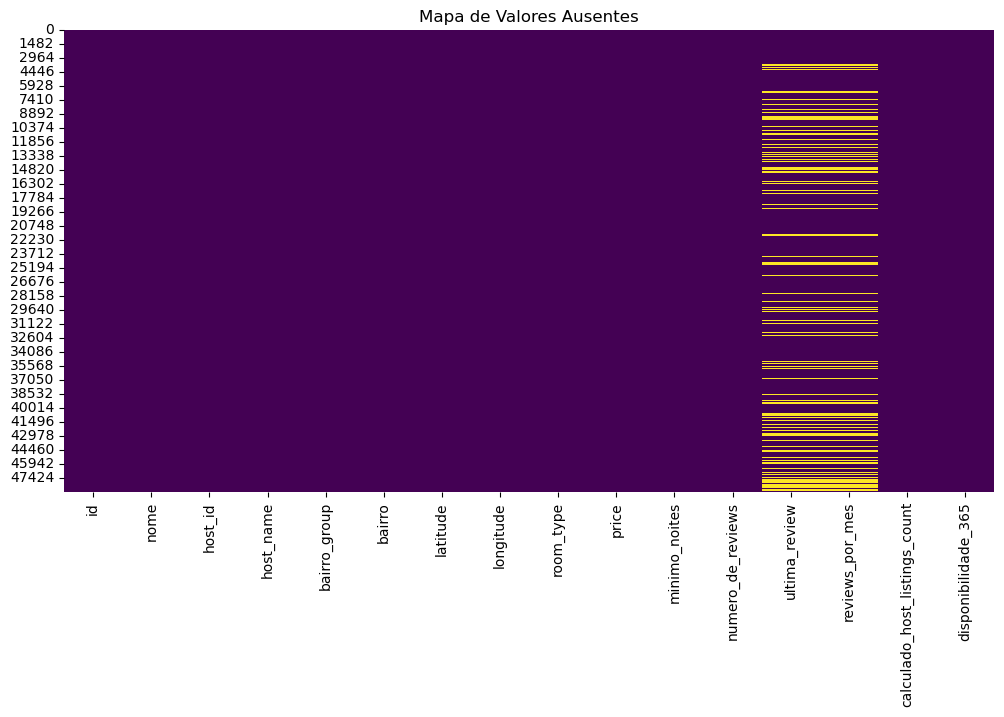

In [7]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de Valores Ausentes')
plt.show()

In [8]:
df.describe()

,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,4.889400e+04,4.889400e+04,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,38842.000000,48894.000000,48894.000000
mean,1.901753e+07,6.762139e+07,40.728951,-73.952169,152.720763,7.030085,23.274758,1.373251,7.144005,112.776169
std,1.098288e+07,7.861118e+07,0.054529,0.046157,240.156625,20.510741,44.550991,1.680453,32.952855,131.618692
min,2.595000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.472371e+06,7.822737e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967743e+07,3.079553e+07,40.723075,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915225e+07,1.074344e+08,40.763117,-73.936273,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


C:\Users\wilso\AppData\Local\Temp\ipykernel_6392\1550072956.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='bairro', y='price', data=df_top_5_bairros, palette='pastel')


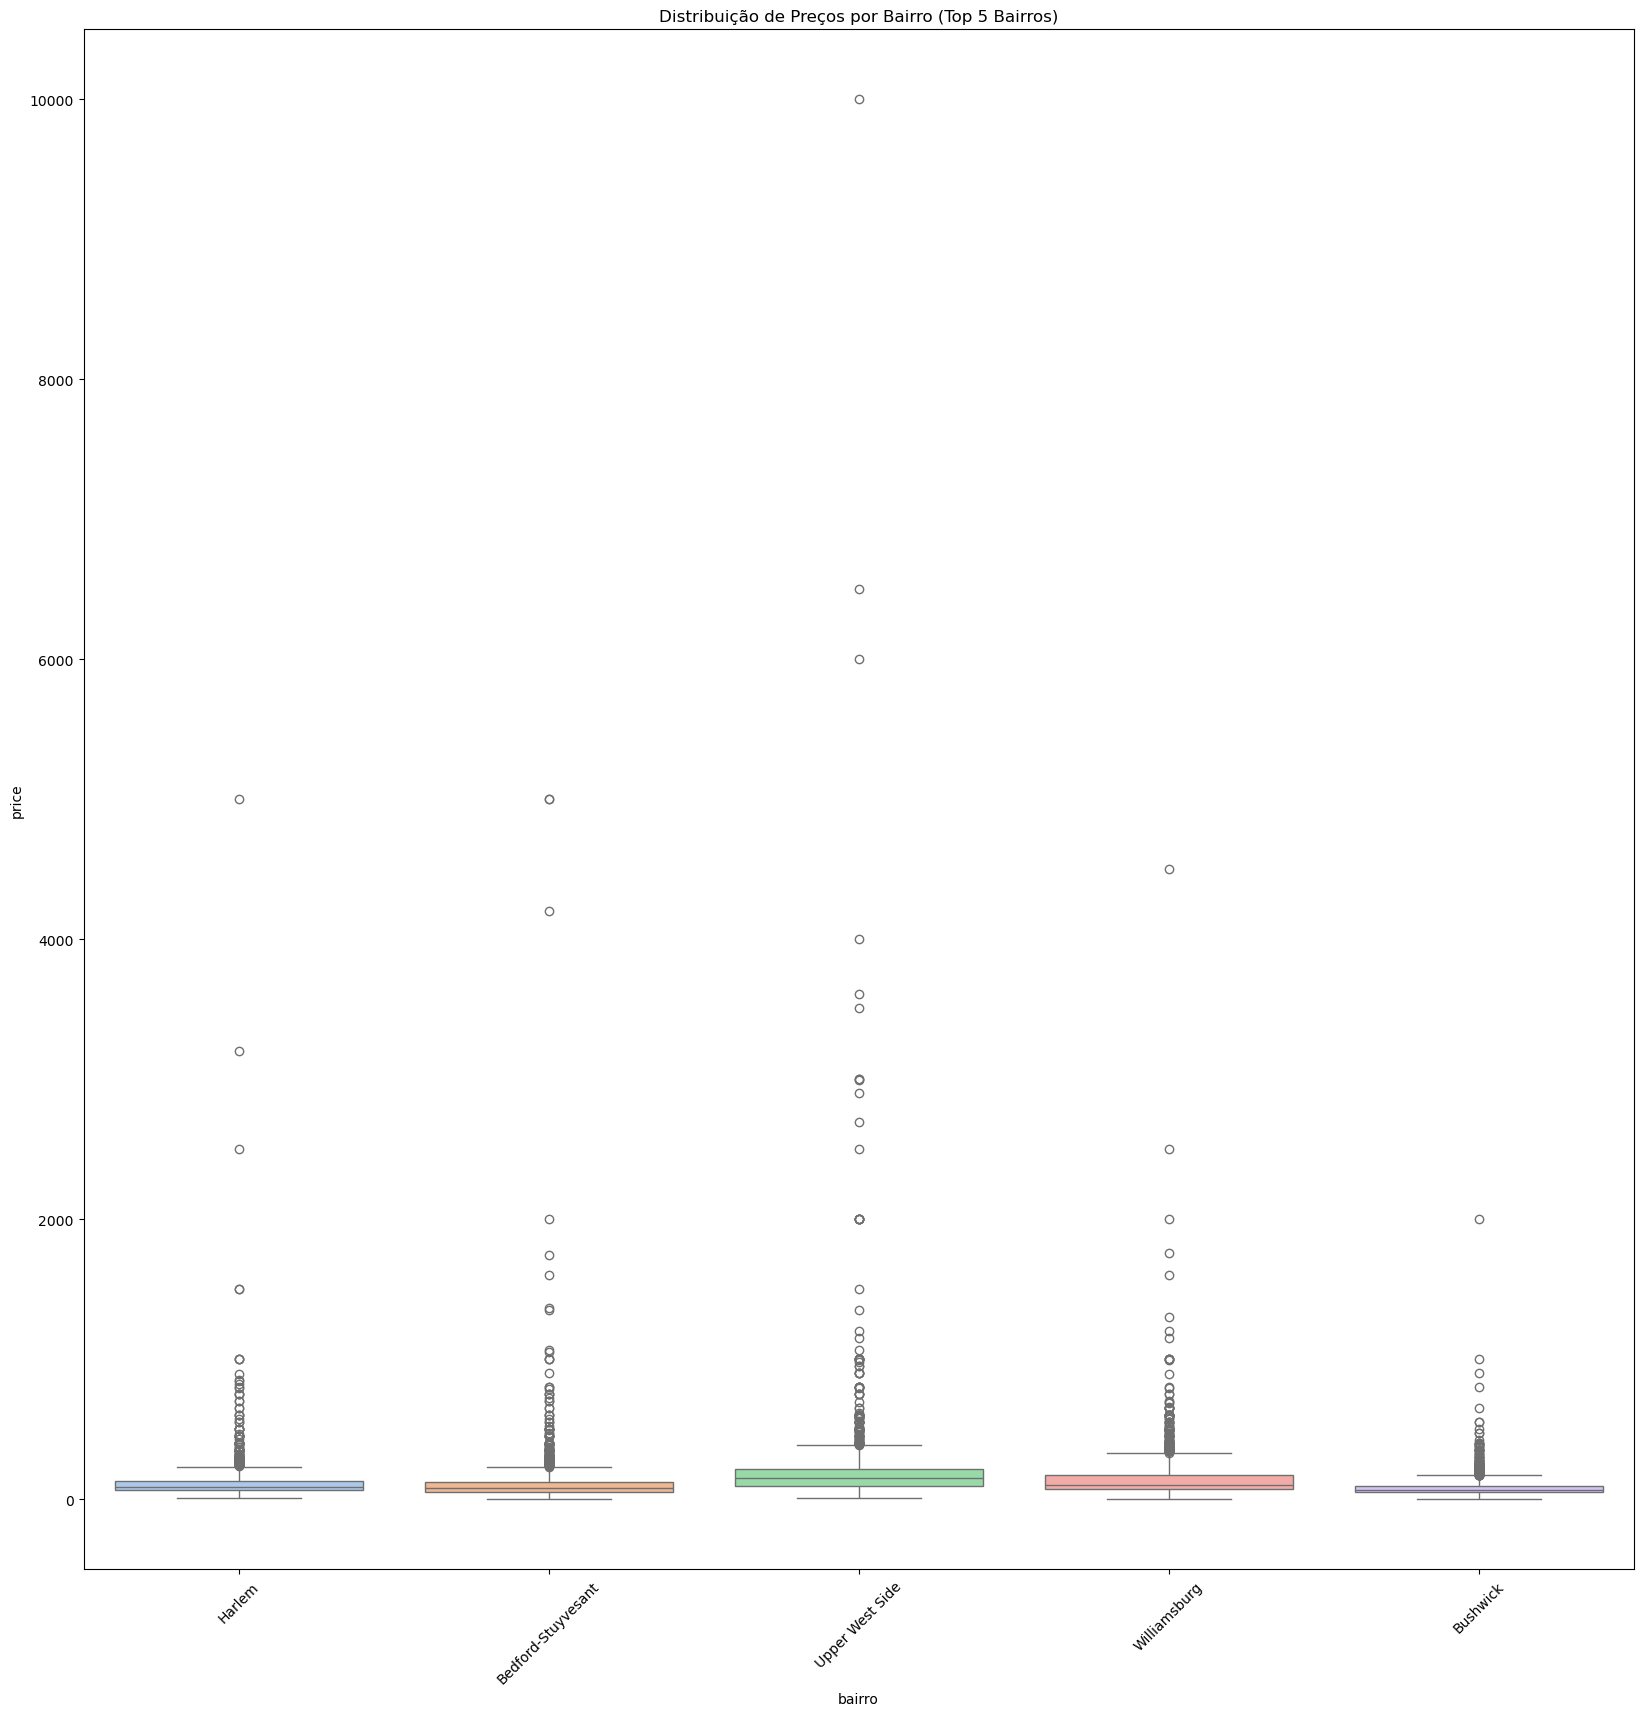

In [9]:
# Hipóteses de negócio
# Exemplo: Bairros com maior disponibilidade tendem a ter preços mais baixos?
top_5_bairros = df['bairro'].value_counts().nlargest(5).index
df_top_5_bairros = df[df['bairro'].isin(top_5_bairros)]

plt.figure(figsize=(20, 20))
sns.boxplot(x='bairro', y='price', data=df_top_5_bairros, palette='pastel')
plt.title('Distribuição de Preços por Bairro (Top 5 Bairros)')
plt.xticks(rotation=45)
plt.show()

In [10]:
df.drop(['id', 'host_id', 'host_name', 'latitude', 'longitude'], axis=1, inplace=True)

In [11]:
df.isnull().sum()

nome                                16
bairro_group                         0
bairro                               0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64

In [12]:
df = df.dropna()
df.isnull().sum()

nome                             0
bairro_group                     0
bairro                           0
room_type                        0
price                            0
minimo_noites                    0
numero_de_reviews                0
ultima_review                    0
reviews_por_mes                  0
calculado_host_listings_count    0
disponibilidade_365              0
dtype: int64

In [13]:
categorical_columns = ['nome', 'bairro_group', 'bairro', 'room_type', 'ultima_review']


In [14]:
numerical_columns = ['minimo_noites', 'numero_de_reviews', 'reviews_por_mes', 'calculado_host_listings_count', 'disponibilidade_365']

In [15]:
onehotencoder = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns),
        ('num', StandardScaler(), numerical_columns)
    ],
    remainder='passthrough'
)


In [16]:
pipeline = Pipeline(steps=[
    ('preprocessor', onehotencoder),
    ('regressor', LinearRegression())
])

In [17]:
X = df[categorical_columns + numerical_columns]
y = df['price']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [19]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['nome', 'bairro_group',
                                                   'bairro', 'room_type',
                                                   'ultima_review']),
                                                 ('num', StandardScaler(),
                                                  ['minimo_noites',
                                                   'numero_de_reviews',
                                                   'reviews_por_mes',
                                                   'calculado_host_listings_count',
                                                   'disponibilidade_365'])])),
                ('regressor', LinearRegression())])

In [20]:
y_pred = pipeline.predict(X_test)

In [21]:
r2 = r2_score(y_test, y_pred)
print(f'R²: {r2}')

R²: 0.051778722113793973


In [22]:
df_results = pd.DataFrame({'Real': y_test, 'Previsto': y_pred})
print(df_results.head())

       Real    Previsto
40047    93  140.726837
42773    69  105.373508
14947   245  210.801077
10934    99  103.737055
12176    80  219.075181


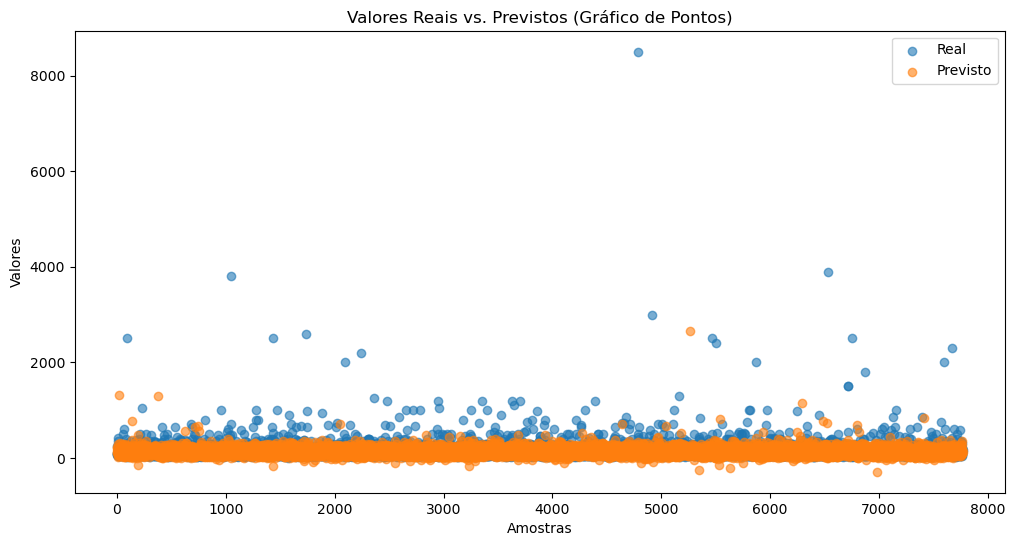

In [23]:
plt.figure(figsize=(12, 6))
plt.scatter(range(len(y_test)), y_test, label='Real', alpha=0.6)
plt.scatter(range(len(y_pred)), y_pred, label='Previsto', alpha=0.6)
plt.legend()
plt.title('Valores Reais vs. Previstos (Gráfico de Pontos)')
plt.xlabel('Amostras')
plt.ylabel('Valores')
plt.show()

In [24]:
linear_regressor = pipeline.named_steps['regressor']

print(linear_regressor.coef_)
print(linear_regressor.intercept_)
print(pipeline.score(X_test, y_test))

[ -9.05860654 101.77451917  30.10904303 ...  -2.2427293    0.96030276
   6.93015475]
102.4816611608716
0.051778722113793973


# Onde seria mais indicada a compra de um apartamento para alugar na plataforma?

Preço médio por bairro:
 bairro
Sea Gate             482.500000
Tribeca              460.300000
NoHo                 298.451613
Flatiron District    291.482759
SoHo                 281.303136
Neponsit             274.666667
Midtown              267.583164
West Village         250.326230
Willowbrook          249.000000
Greenwich Village    239.120915
Name: price, dtype: float64
**********************************
Reviews por bairro:
 bairro
Bedford-Stuyvesant    110352
Williamsburg           85427
Harlem                 75962
Bushwick               52509
Hell's Kitchen         50226
East Village           44642
East Harlem            36446
Crown Heights          36408
Upper West Side        36058
Upper East Side        31686
Name: numero_de_reviews, dtype: int64


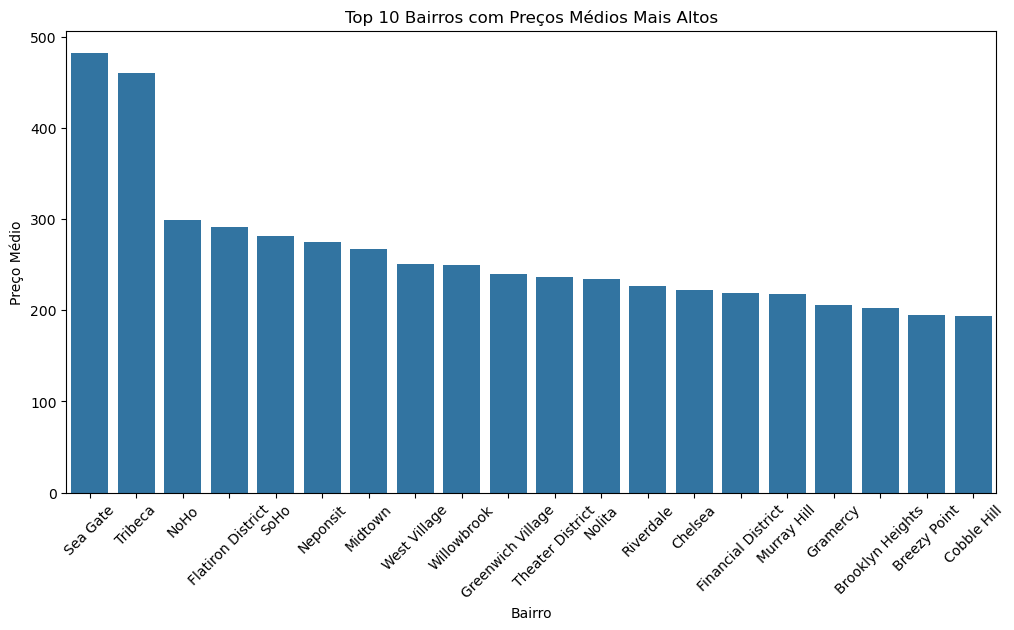

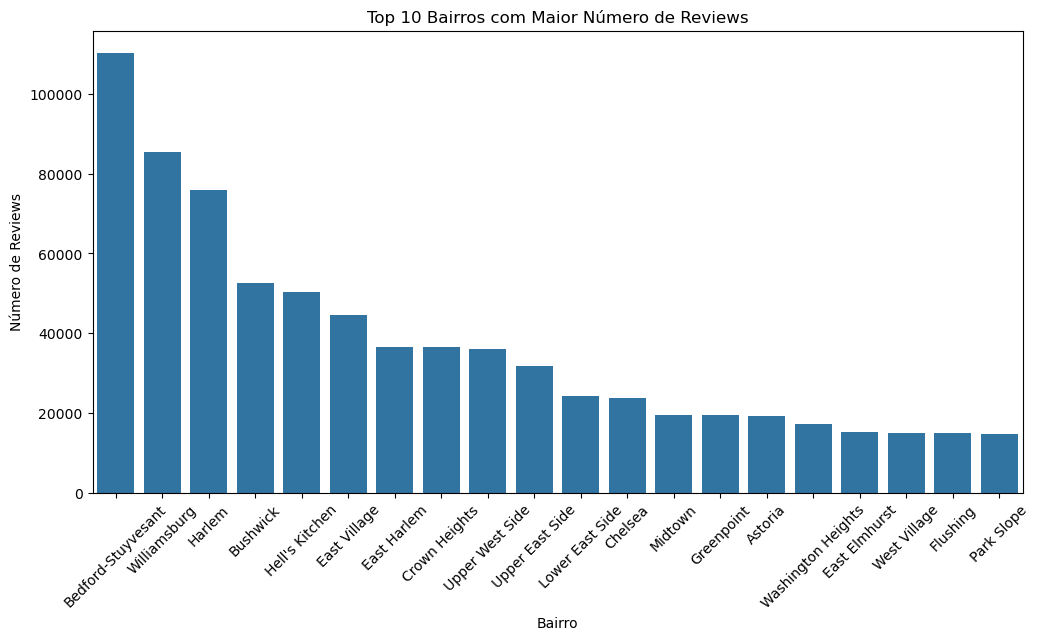

In [25]:
top = 20

bairro_avg_price = df.groupby('bairro')['price'].mean().sort_values(ascending=False)
print('Preço médio por bairro:\n',bairro_avg_price.head(10))

print('**********************************')

bairro_reviews = df.groupby('bairro')['numero_de_reviews'].sum().sort_values(ascending=False)
print('Reviews por bairro:\n', (bairro_reviews.head(10)))

plt.figure(figsize=(12, 6))
sns.barplot(x=bairro_avg_price.index[:top], y=bairro_avg_price.values[:top])
plt.title('Top 10 Bairros com Preços Médios Mais Altos')
plt.xlabel('Bairro')
plt.ylabel('Preço Médio')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=bairro_reviews.index[:top], y=bairro_reviews.values[:top])
plt.title('Top 10 Bairros com Maior Número de Reviews')
plt.xlabel('Bairro')
plt.ylabel('Número de Reviews')
plt.xticks(rotation=45)
plt.show()

# O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?

                     minimo_noites  disponibilidade_365     price
minimo_noites             1.000000             0.101729  0.025509
disponibilidade_365       0.101729             1.000000  0.078276
price                     0.025509             0.078276  1.000000


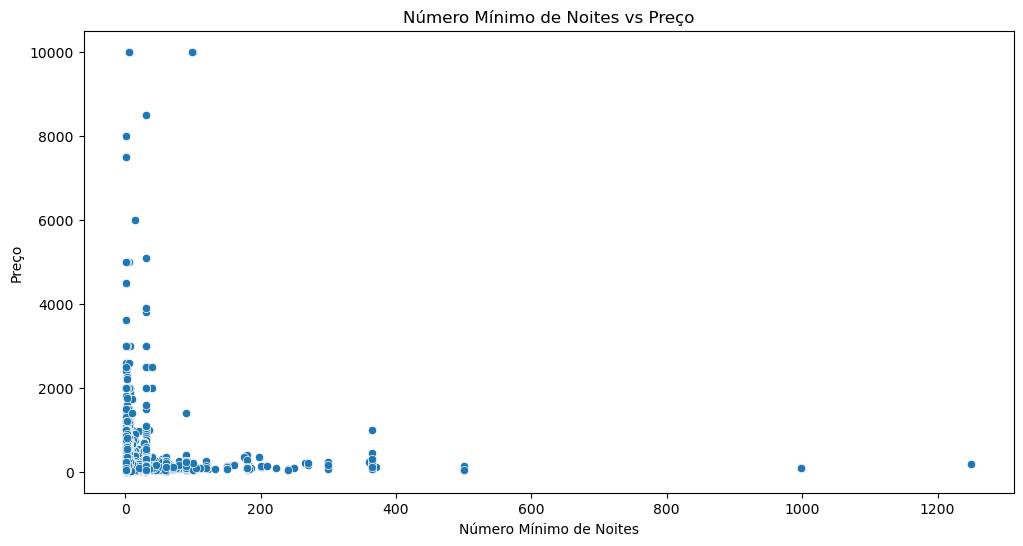

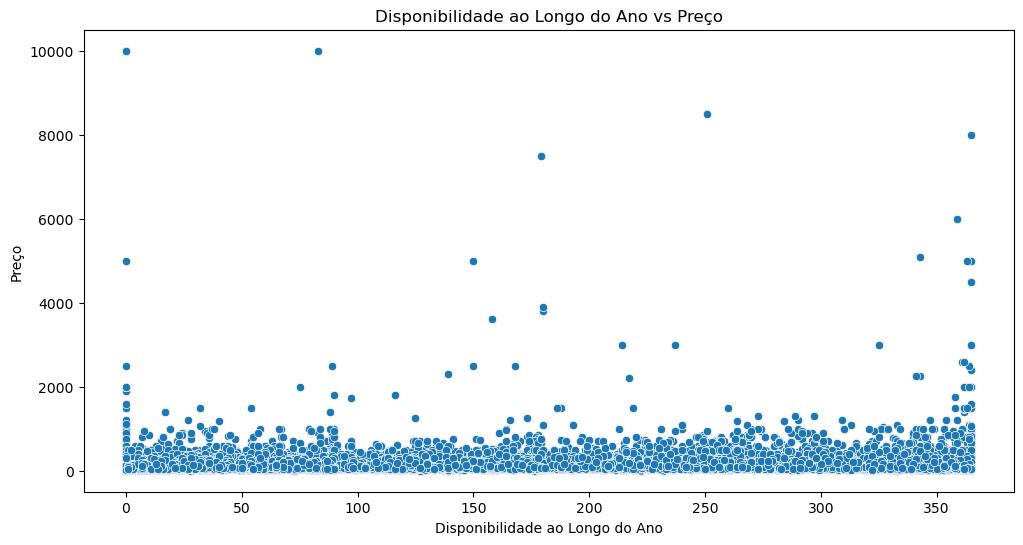

In [26]:
correlation = df[['minimo_noites', 'disponibilidade_365', 'price']].corr()
print(correlation)

plt.figure(figsize=(12, 6))
sns.scatterplot(x='minimo_noites', y='price', data=df)
plt.title('Número Mínimo de Noites vs Preço')
plt.xlabel('Número Mínimo de Noites')
plt.ylabel('Preço')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='disponibilidade_365', y='price', data=df)
plt.title('Disponibilidade ao Longo do Ano vs Preço')
plt.xlabel('Disponibilidade ao Longo do Ano')
plt.ylabel('Preço')
plt.show()

# Existe algum padrão no texto do nome do local para lugares de mais alto valor?

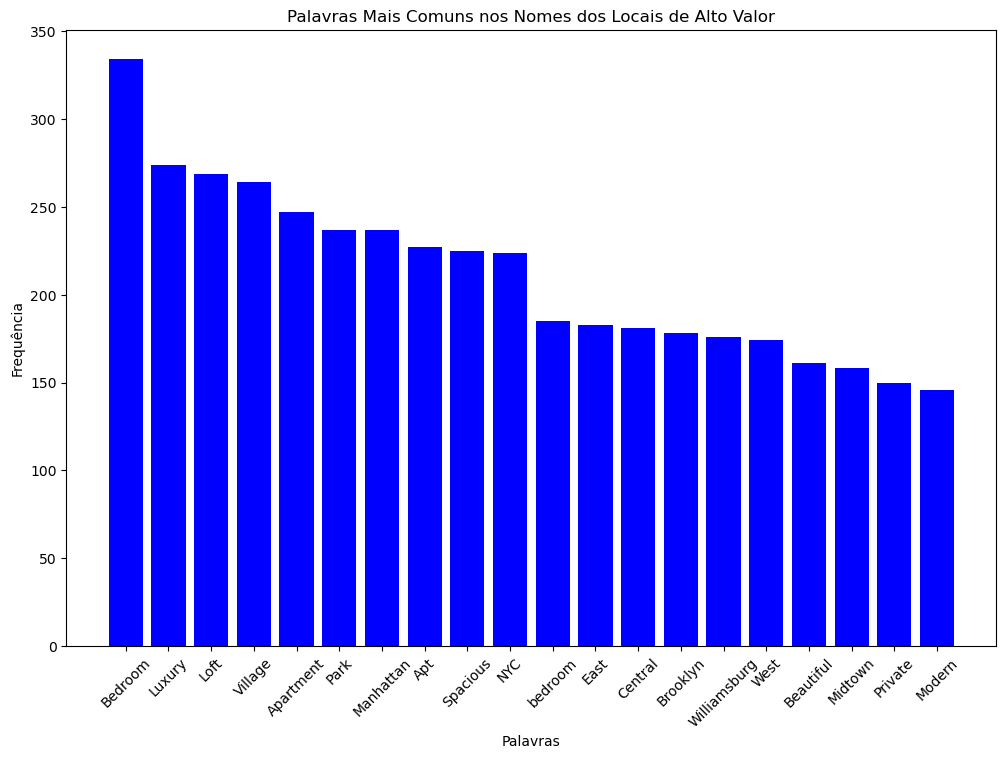

In [27]:
import spacy
from collections import Counter

nlp = spacy.load('en_core_web_sm')

high_value_places = df[df['price'] > df['price'].quantile(0.9)]

content = ' '.join(high_value_places['nome'].astype(str).tolist())

doc = nlp(content)

token_list = [token.text for token in doc]
no_stop_words = [word for word in token_list if not nlp.vocab[word].is_stop and word.isalpha()]

word_counts = Counter(no_stop_words)

common_words = word_counts.most_common(20)

words, counts = zip(*common_words)

plt.figure(figsize=(12, 8))
plt.bar(words, counts, color='blue')
plt.title('Palavras Mais Comuns nos Nomes dos Locais de Alto Valor')
plt.xlabel('Palavras')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.show()

# Explique como você faria a previsão do preço a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?

1. Tipo de Problema
Estamos resolvendo um problema de regressão, onde a variável alvo é contínua (preço do aluguel). A regressão linear foi escolhida como modelo inicial devido à sua simplicidade e interpretabilidade.

2. Seleção das Variáveis
Foram utilizadas as seguintes variáveis do dataset:

    - Variáveis categóricas:
        - nome
        - bairro_group
        - bairro
        - room_type
        - ultima_review
    - Variáveis numéricas:
        - minimo_noites
        - numero_de_reviews
        - reviews_por_mes
        - calculado_host_listings_count
        - disponibilidade_365
  
    Essas variáveis foram escolhidas porque podem influenciar diretamente o preço do aluguel. Por exemplo, o bairro e o tipo de quarto são fatores importantes que podem afetar o preço.

3. Transformação das Variáveis
   
    Para preparar os dados para o modelo de regressão linear, foram aplicadas as seguintes transformações:

        - OneHotEncoder: Utilizei OneHotEncoder para transformar as variáveis categóricas em variáveis dummy. Isso é necessário porque os modelos de regressão linear não podem lidar diretamente com variáveis categóricas.
        - StandardScaler: Utilizei StandardScaler para normalizar as variáveis numéricas. A normalização é importante para garantir que todas as variáveis numéricas tenham a mesma escala, o que pode melhorar a performance do modelo.
  
4. Construção do Pipeline
    Criei um pipeline que inclui as etapas de pré-processamento e o modelo de regressão linear. O pipeline facilita a aplicação das transformações e o treinamento do modelo em uma única etapa.

5. Treinamento e Avaliação do Modelo
    Dividi os dados em conjuntos de treino e teste utilizando train_test_split. O modelo foi treinado com os dados de treino e avaliado com os dados de teste. Utilizei o coeficiente de determinação (R²) como medida de performance do modelo. O R² indica a proporção da variância da variável dependente que é explicada pelas variáveis independentes no modelo. Um valor de R² próximo de 1 indica um bom ajuste do modelo aos dados.

6. Previsão do Preço
    Para prever o preço de um novo apartamento, apliquei as mesmas transformações utilizadas no treinamento do modelo e utilizamos o modelo treinado para fazer a previsão.

# Supondo um apartamento com as seguintes características:

```
{'id': 2595,
 'nome': 'Skylit Midtown Castle',
 'host_id': 2845,
 'host_name': 'Jennifer',
 'bairro_group': 'Manhattan',
 'bairro': 'Midtown',
 'latitude': 40.75362,
 'longitude': -73.98377,
 'room_type': 'Entire home/apt',
 'minimo_noites': 1,
 'numero_de_reviews': 45,
 'ultima_review': '2019-05-21',
 'reviews_por_mes': 0.38,
 'calculado_host_listings_count': 2,
 'disponibilidade_365': 355}
```

# Qual seria a sua sugestão de preço?


In [ ]:
df = pd.read_csv('teste_indicium_precificacao.csv')

df = df.dropna()

categorical_columns = ['nome', 'bairro_group', 'bairro', 'room_type', 'ultima_review']

numerical_columns = ['minimo_noites', 'numero_de_reviews', 'reviews_por_mes', 'calculado_host_listings_count', 'disponibilidade_365']

onehotencoder = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns)
    ],
    remainder='passthrough'
)

X = df[categorical_columns + numerical_columns]
X = onehotencoder.fit_transform(X)

y = df['price']

regressor = LinearRegression()
regressor.fit(X, y)

apartment_features = {
    'nome': 'Skylit Midtown Castle',
    'bairro_group': 'Manhattan',
    'bairro': 'Midtown',
    'room_type': 'Entire home/apt',
    'minimo_noites': 1,
    'numero_de_reviews': 45,
    'ultima_review': '2019-05-21',
    'reviews_por_mes': 0.38,
    'calculado_host_listings_count': 2,
    'disponibilidade_365': 355
}

apartment_df = pd.DataFrame([apartment_features])

predicted_price = pipeline.predict(apartment_df)

print(f'Sugestão de preço: ${predicted_price[0]:.2f}')

Sugestão de preço: $224.94


# Salve o modelo desenvolvido no formato .pkl. 

In [29]:
with open('model.pkl', 'wb') as file:
    pickle.dump([X_train, y_train, X_test, y_test, regressor], file)